In [5]:
import pandas as pd
import numpy as np

# Load the given data
data = pd.read_csv("C:/Users/raghavendra/Downloads/xy_data.csv")

# Separate columns
x_data = data['x'].values
y_data = data['y'].values

# Generate t values between 6 and 60
t_data = np.linspace(6, 60, len(data))


In [6]:
# define the mathematical model
def curve_model(t, theta, M, X):
    x = t*np.cos(theta) - np.exp(M*np.abs(t))*np.sin(0.3*t)*np.sin(theta) + X
    y = 42 + t*np.sin(theta) + np.exp(M*np.abs(t))*np.sin(0.3*t)*np.cos(theta)
    return x, y


In [7]:
# define the error function
def loss(params, t, x_data, y_data):
    theta, M, X = params
    x_pred, y_pred = curve_model(t, theta, M, X)
    return np.sum(np.abs(x_data - x_pred) + np.abs(y_data - y_pred))


In [8]:
# Running Optimization
from scipy.optimize import minimize

# Define parameter bounds
bounds = [(0, np.deg2rad(50)), (-0.05, 0.05), (0, 100)]
initial_guess = [np.deg2rad(25), 0, 50]

result = minimize(
    loss, 
    initial_guess,
    args=(t_data, x_data, y_data),
    bounds=bounds,
    method='L-BFGS-B'
)

theta_opt, M_opt, X_opt = result.x
print("Theta (deg):", np.rad2deg(theta_opt))
print("M:", M_opt)
print("X:", X_opt)


Theta (deg): 28.118390735330923
M: 0.021388775923741467
X: 54.90077808957083


Total L1 distance: 37865.0938743836


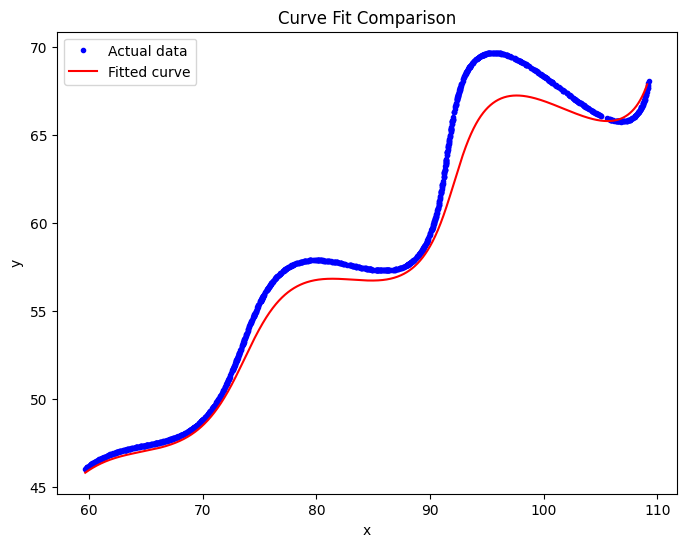

In [10]:
# Visualization Verification
import matplotlib.pyplot as plt

x_pred, y_pred = curve_model(t_data, theta_opt, M_opt, X_opt)

plt.figure(figsize=(8,6))
plt.plot(x_data, y_data, 'b.', label='Actual data')
plt.plot(x_pred, y_pred, 'r-', label='Fitted curve')
plt.legend()
L1_score = np.sum(np.abs(x_data - x_pred) + np.abs(y_data - y_pred))
print("Total L1 distance:", L1_score)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Curve Fit Comparison')
plt.show()


In [11]:
L1_score = np.sum(np.abs(x_data - x_pred) + np.abs(y_data - y_pred))
print("Total L1 distance:", L1_score)


Total L1 distance: 37865.0938743836
